# Plotting with matplotlib
- Reference:
- [https://matplotlib.org/stable/gallery/color/colormap_reference.html](https://matplotlib.org/stable/gallery/color/colormap_reference.html)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### read in atlanta temperature data

In [2]:
df=pd.read_csv('Boston.csv',index_col=0,na_values=-999)

In [3]:
df

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL
Year,,,,,,,,,,,,,
1872,NaN,NaN,26.5,46.6,59.3,68.9,75.7,73.0,64.4,51.9,40.6,23.1,53.0
1873,25.1,26.4,33.9,44.9,56.5,67.3,72.9,69.8,62.8,53.5,33.3,32.1,48.2
1874,30.5,27.0,34.4,38.8,55.5,66.1,72.9,68.1,64.4,53.2,41.6,31.3,48.6
1875,20.1,22.3,31.3,42.5,57.9,66.7,72.1,71.0,59.6,50.1,34.9,29.6,46.5
1876,30.7,27.5,33.5,43.9,54.6,68.9,74.0,70.3,59.9,48.3,41.4,22.2,47.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019,30.7,33.5,39.1,51.7,57.8,68.2,78.7,74.1,68.0,57.4,42.8,37.2,53.3
2020,38.0,37.8,41.8,44.6,56.8,69.2,75.3,74.1,65.6,54.7,48.0,36.0,53.5
2021,31.0,30.8,42.0,50.8,61.4,74.4,72.4,76.9,69.7,59.9,44.7,39.2,54.4


## Multi-panel plot 1
- Generate 3 panel, single column figure object

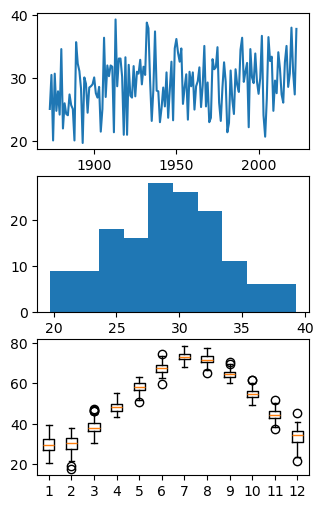

In [4]:
fig=plt.figure(figsize=(3.5,6))
ax =fig.subplots(3,1)
ax[0].plot(df['JAN'])
ax[1].hist(df['JAN'])
ax[2].boxplot(df.loc[1900:2024].iloc[:,0:12])
plt.show()

#### let's add axis and titles labels, but they overlap with other panels, what do I do?

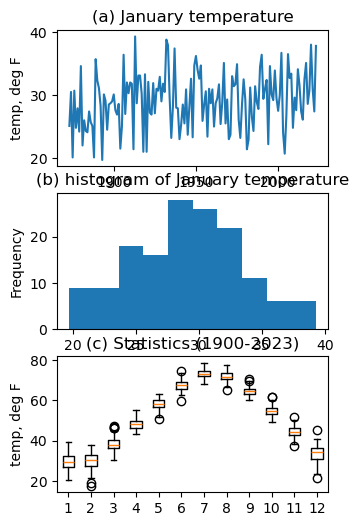

In [5]:
fig=plt.figure(figsize=(3.5,6))
ax =fig.subplots(3,1)
ax[0].plot(df['JAN'])
ax[0].set_ylabel('temp, deg F')
ax[0].set_title('(a) January temperature')
#
ax[1].hist(df['JAN'])
ax[1].set_title('(b) histogram of January temperature')
ax[1].set_ylabel('Frequency')
#
ax[2].boxplot(df.loc[1900:2024].iloc[:,0:12])
ax[2].set_title('(c) Statistics (1900-2023)')
ax[2].set_ylabel('temp, deg F')
plt.show()

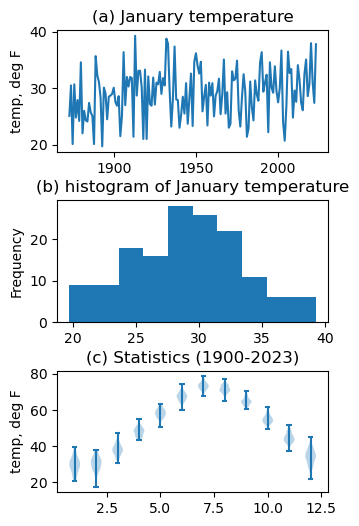

In [6]:
fig=plt.figure(figsize=(3.5,6))
ax =fig.subplots(3,1)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=.4)
#
ax[0].plot(df['JAN'])
ax[0].set_ylabel('temp, deg F')
ax[0].set_title('(a) January temperature')
#
ax[1].hist(df['JAN'])
ax[1].set_title('(b) histogram of January temperature')
ax[1].set_ylabel('Frequency')
#
ax[2].violinplot(df.loc[1900:2024].iloc[:,0:12])
ax[2].set_title('(c) Statistics (1900-2023)')
ax[2].set_ylabel('temp, deg F')
plt.savefig('Boston_T_single_col.pdf',bbox_inches='tight')
plt.show()

## Multi-panel plot 2
- Generate 6 panel, double column figure object

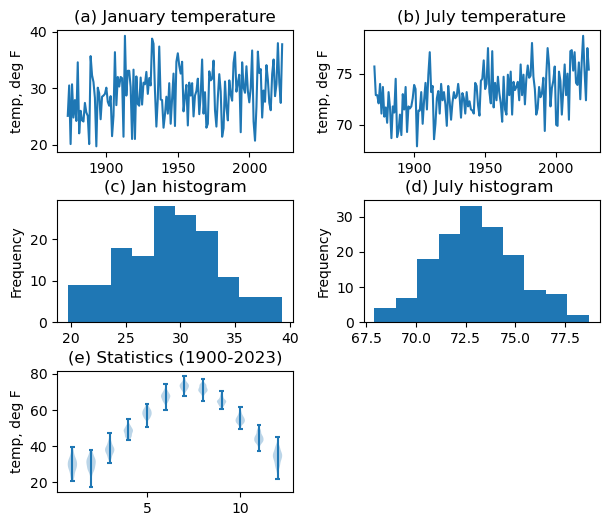

In [7]:
fig=plt.figure(figsize=(7,6))
ax =fig.subplots(3,2)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.3, hspace=.4)
#
ax[0,0].plot(df['JAN'])
ax[0,0].set_ylabel('temp, deg F')
ax[0,0].set_title('(a) January temperature')
#
ax[1,0].hist(df['JAN'])
ax[1,0].set_title('(c) Jan histogram')
ax[1,0].set_ylabel('Frequency')
#
ax[2,0].violinplot(df.loc[1900:2024].iloc[:,0:12])
ax[2,0].set_title('(e) Statistics (1900-2023)')
ax[2,0].set_ylabel('temp, deg F')
#
ax[0,1].plot(df['JUL'])
ax[0,1].set_ylabel('temp, deg F')
ax[0,1].set_title('(b) July temperature')
#
ax[1,1].hist(df['JUL'])
ax[1,1].set_title('(d) July histogram ')
ax[1,1].set_ylabel('Frequency')
#
ax[2,1].remove()
#
plt.savefig('Boston_T_double_col.pdf',bbox_inches='tight')
plt.show()

### Fully customize figure axes
- ax=fig.add_axes([x, y, w, h])

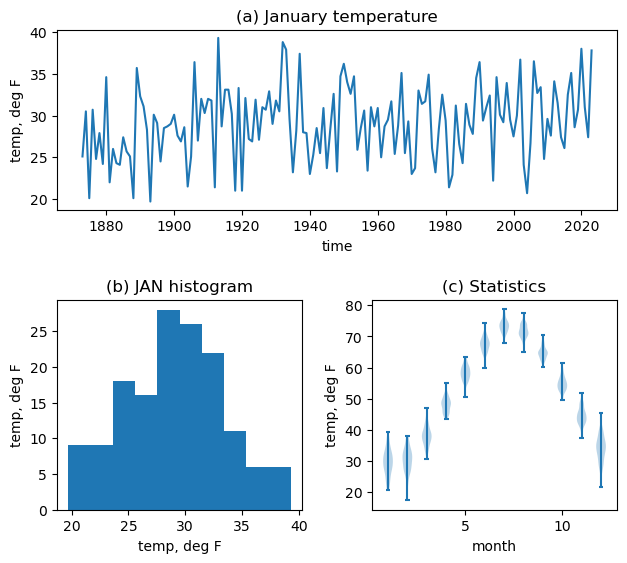

In [8]:
fig=plt.figure(figsize=(7,6))
#
ax1 = fig.add_axes([.1,.6,.8,.3])
ax1.plot(df['JAN'])
ax1.set_ylabel('temp, deg F')
ax1.set_title('(a) January temperature')
ax1.set_xlabel('time')
#
ax2 = fig.add_axes([.1,.1,.35,.35])
ax2.hist(df['JAN'])
ax2.set_ylabel('temp, deg F')
ax2.set_xlabel('temp, deg F')
ax2.set_title('(b) JAN histogram')
#
ax3 = fig.add_axes([.55,.1,.35,.35])
ax3.violinplot(df.loc[1900:2024].iloc[:,:12])
ax3.set_ylabel('temp, deg F')
ax3.set_title('(c) Statistics')
ax3.set_xlabel('month')
#
plt.savefig('Boston_T_double_custom.pdf',bbox_inches='tight')
plt.show()

## Visualize temperature trend with color plot
- First calculate temperature anomaly from monthly long-term means
- Then, plot temperature anomaly using different color shading

In [9]:
# extract data from 1900
temp_abs = df.loc[1900:2024].iloc[:,0:12].to_numpy()

In [10]:
# calculate monthly means
temp_mean= np.nanmean(temp_abs,axis=0)

In [11]:
# subtract mean from abs to obtain anomalies
temp_anom= temp_abs - temp_mean

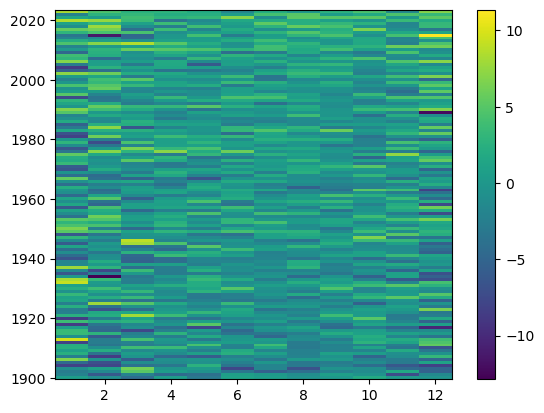

In [12]:
# generate color plot using default colormap
#
year = np.arange(1900,2024,1)
mon  = np.arange(1,13,1)
#
im=plt.pcolormesh(mon,year,temp_anom)
plt.colorbar(im)

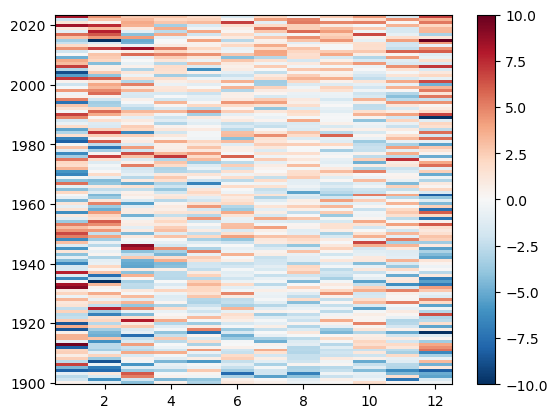

In [13]:
# generate color plot with diverging colormap
# adjust max and min values so it is zero-centered
#
im=plt.pcolormesh(mon,year,temp_anom,cmap='RdBu_r',vmin=-10,vmax=10)
plt.colorbar(im)

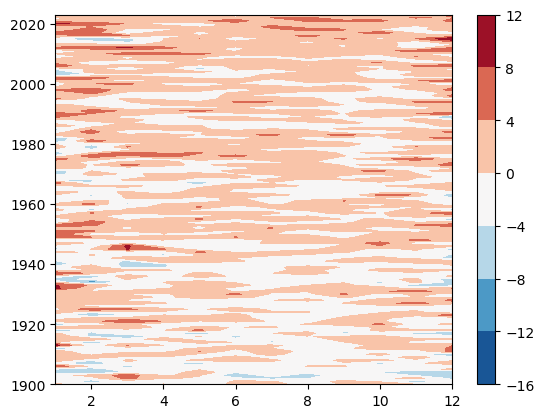

In [14]:
# generate contour map to apply smoothing
#
im=plt.contourf(mon,year,temp_anom,cmap='RdBu_r')
plt.colorbar(im)

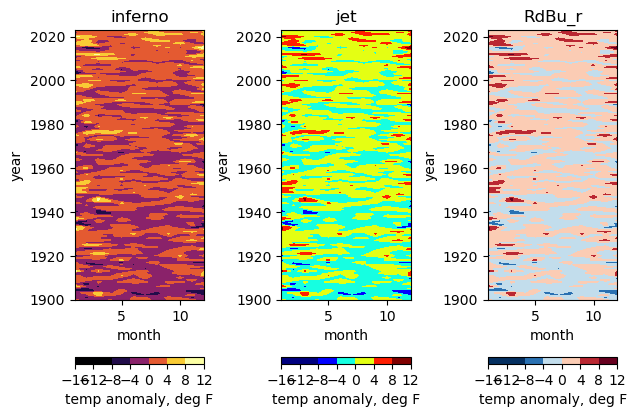

In [17]:
fig=plt.figure(figsize=(7,5))
ax=fig.subplots(1,3)
plt.subplots_adjust(wspace=.6)
cmaps=['inferno','jet','RdBu_r']
for n,cm in enumerate(cmaps):
    im=ax[n].contourf(mon,year,temp_anom,cmap=cm,vmax=8,vmin=-8)
    ax[n].set_title(cm)
    ax[n].set_xlabel('month')
    ax[n].set_ylabel('year')
    plt.colorbar(im,ax=ax[n],location='bottom',label='temp anomaly, deg F')
#
plt.savefig('temp_anomaly_3cmaps.pdf',bbox_inches='tight')